In [1]:
import numpy as np
import pandas
from sklearn.tree import DecisionTreeClassifier

data = pandas.read_csv('titanic.csv', index_col='PassengerId')

In [2]:
d = data[data.Age.notnull()]
d['Sex'] = d['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
X = d[['Pclass', 'Fare', 'Age', 'Sex']]
Y = d['Survived']

# print(X.describe())
# print(Y.describe())

import numpy as np
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=241)
clf.fit(X, Y)
importances = clf.feature_importances_

importances

/home/ivan/.virtualenvs/ml/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


array([ 0.14000522,  0.30343647,  0.2560461 ,  0.30051221])

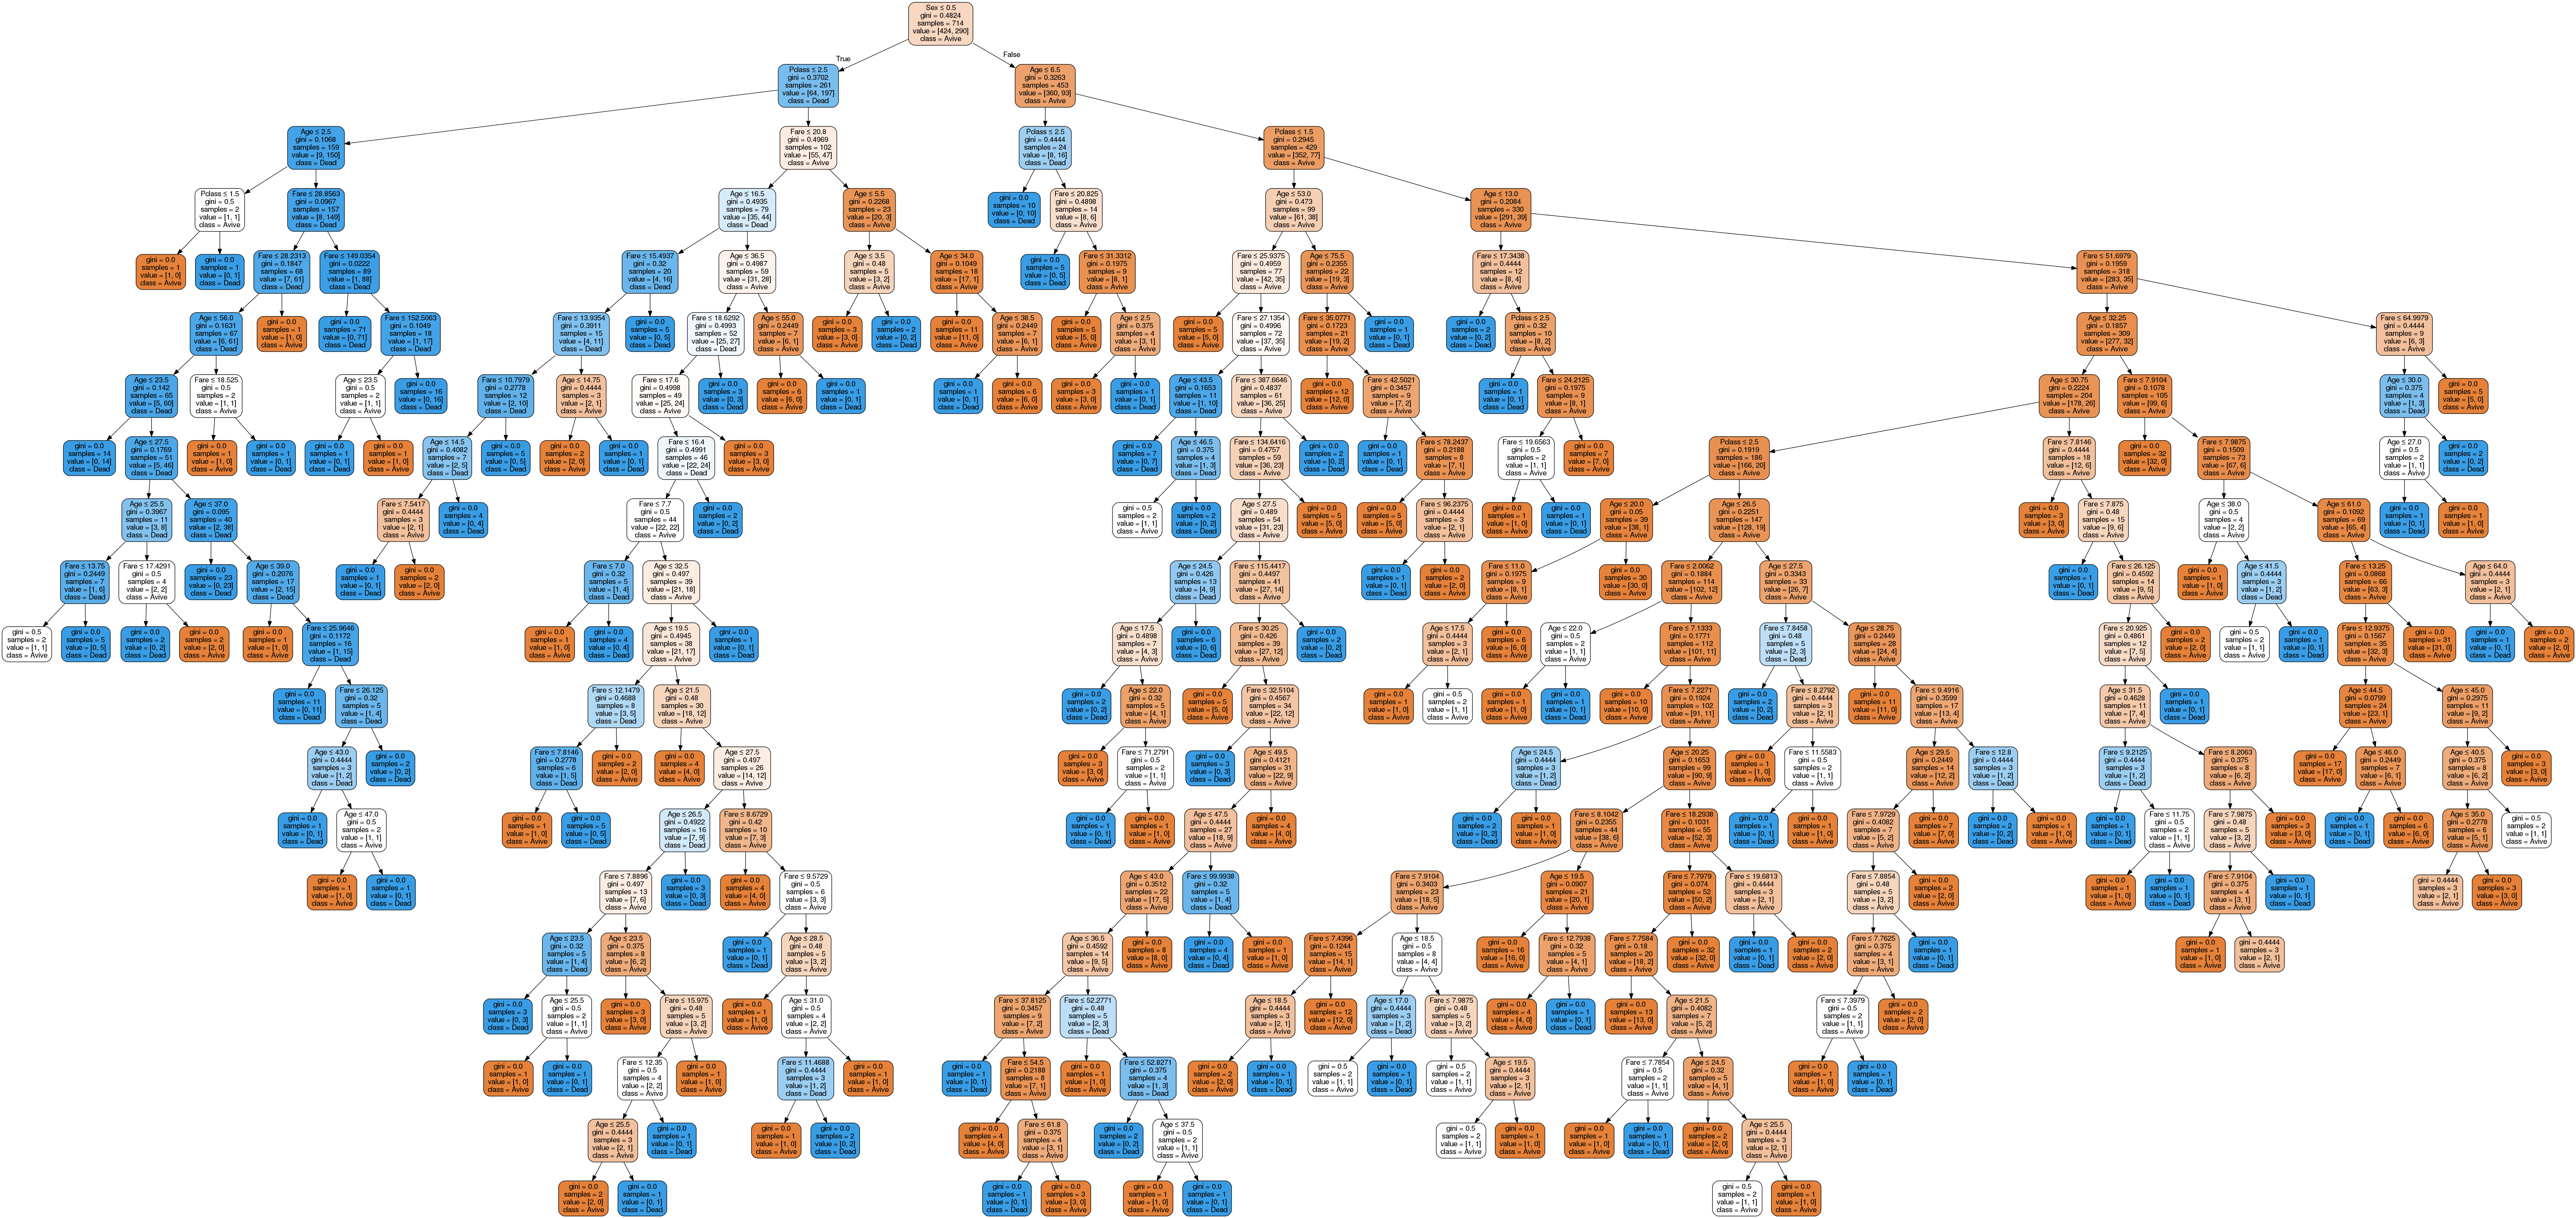

In [3]:
from IPython.display import Image
from sklearn import tree
from sklearn.externals.six import StringIO  
import pydot 

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=['Pclass', 'Fare', 'Age', 'Sex'],  
                         class_names=['Avive', 'Dead'],  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())  